In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from sklearn.model_selection import train_test_split

In [4]:
# Import Keras
from keras import backend as K
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [5]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [9]:
df=pd.read_csv('/content/sample_data/dataset_for_technical_assessment.csv')
df=df.loc[df.y1.notnull(),:]
df=df.loc[df.x4.notnull()]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['y1','y2','Description'],axis=1),df[['y1']],test_size=0.2,random_state =42)

In [11]:
def mape(x,y):
    val=np.mean(abs((reg.predict(x)-y)/y))
    return val
  

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train[["x1",'x2','x3','x4','x5','x6','x7','x8']], y_train)
#reg.score(x_train.loc[:,["x1"]], y_train)
mape(x_test[["x1",'x2','x3','x4','x5','x6','x7','x8']], y_test)


y1    11.619607
dtype: float64

In [13]:
df.head(3)

,Description,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,2016-01-01 00:00:00,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
1,2016-01-01 00:05:00,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014
2,2016-01-01 00:10:00,0.008906,0.809219,0.934031,0.181439,0.282202,0.610927,0.222187,0.034264,0.692654,0.289457


In [192]:
#df['new_col']=df[['x1',	'x2',	'x3',	'x4',	'x5',	'x6',	'x7',	'x8']].values.tolist()

<ipython-input-192-88c64ef8a72f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_col']=df[['x1',	'x2',	'x3',	'x4',	'x5',	'x6',	'x7',	'x8']].values.tolist()


In [14]:
df

,Description,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,2016-01-01 00:00:00,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
1,2016-01-01 00:05:00,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014
2,2016-01-01 00:10:00,0.008906,0.809219,0.934031,0.181439,0.282202,0.610927,0.222187,0.034264,0.692654,0.289457
3,2016-01-01 00:15:00,0.008469,0.804602,0.934367,0.182620,0.282305,0.612801,0.221935,0.034894,0.693397,0.290959
4,2016-01-01 00:20:00,0.006882,0.799026,0.934884,0.180871,0.281051,0.610566,0.218883,0.038596,0.690928,0.287653
...,...,...,...,...,...,...,...,...,...,...,...
157807,2017-07-01 23:35:00,0.007516,0.725023,0.948420,0.627338,0.632173,0.631040,0.261269,0.042838,0.683385,0.231942
157808,2017-07-01 23:40:00,0.007683,0.722261,0.949335,0.633572,0.639500,0.628861,0.260363,0.046228,0.683139,0.227148
157809,2017-07-01 23:45:00,0.008906,0.728316,0.948450,0.639345,0.645229,0.632574,0.262826,0.043451,0.690426,0.236186
157810,2017-07-01 23:50:00,0.009094,0.733958,0.946910,0.640376,0.646174,0.634153,0.269820,0.045295,0.693872,0.242765


In [82]:
timesteps = 36
i=0
df1= pd.DataFrame()
for i in range(0,df.shape[0]):
    df2 = pd.DataFrame(np.reshape(df.iloc[i:i+timesteps,1].values,(1,timesteps)))
    df2['y1'] = df.iloc[i+timesteps,1]
    if i == 0 :
      df1= df2
    else:
      df1= pd.concat([df1,df2],axis=0)
    i = i + 1
    
    if i >= 100000:
      break
#df1.columns =['x','y']     



In [85]:
x_train=np.array(df1.iloc[:,:36].values)
y_train=np.array(df1.iloc[:,36])

In [88]:
timesteps = 36
i=0
df1= pd.DataFrame()
for i in range(100000,df.shape[0]-36):
    df2 = pd.DataFrame(np.reshape(df.iloc[i:i+timesteps,1].values,(1,timesteps)))
    df2['y1'] = df.iloc[i+timesteps,1]
    if i == 0 :
      df1= df2
    else:
      df1= pd.concat([df1,df2],axis=0)
    i = i + 1

In [54]:
x_test=np.array(list(df1.iloc[:,:12].values))
y_test=np.array(list(df1.iloc[:,12]))


In [23]:
BATCH_SIZE = 256 # bacth size in batch-SGD/variants
BUFFER_SIZE = 10000 # for shuffling the dataset

train_univariate = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat

val_univariate = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

print(train_univariate)
print(val_univariate)


<RepeatDataset element_spec=(TensorSpec(shape=(None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [28]:
x_train

array([[0.00813275, 0.00896427, 0.00890563, ..., 0.00796922, 0.00813275,
        0.00726327],
       [0.00896427, 0.00890563, 0.00846921, ..., 0.00813275, 0.00726327,
        0.00812748],
       [0.00890563, 0.00846921, 0.00688185, ..., 0.00726327, 0.00812748,
        0.00890563],
       ...,
       [0.68178925, 0.68575023, 0.67756007, ..., 0.68818535, 0.68321142,
        0.68428941],
       [0.68575023, 0.67756007, 0.68542744, ..., 0.68321142, 0.68428941,
        0.68323352],
       [0.67756007, 0.68542744, 0.68447361, ..., 0.68428941, 0.68323352,
        0.68695529]])

In [67]:
# x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#y_train = y_train.reshape(y_train.shape[0],)
# x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#y_test = y_test.reshape(y_test.shape[0],)

In [78]:
x_train

array([[[0.00813275],
        [0.00896427],
        [0.00890563],
        ...,
        [0.00796922],
        [0.00813275],
        [0.00726327]],

       [[0.00896427],
        [0.00890563],
        [0.00846921],
        ...,
        [0.00813275],
        [0.00726327],
        [0.00812748]],

       [[0.00890563],
        [0.00846921],
        [0.00688185],
        ...,
        [0.00726327],
        [0.00812748],
        [0.00890563]],

       ...,

       [[0.68178925],
        [0.68575023],
        [0.67756007],
        ...,
        [0.68818535],
        [0.68321142],
        [0.68428941]],

       [[0.68575023],
        [0.67756007],
        [0.68542744],
        ...,
        [0.68321142],
        [0.68428941],
        [0.68323352]],

       [[0.67756007],
        [0.68542744],
        [0.68447361],
        ...,
        [0.68428941],
        [0.68323352],
        [0.68695529]]])

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100000, 12, 1)
(100000,)
(57717, 12, 1)
(57717,)


In [80]:
# MODEL:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae',metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

# Why not GRUs?
# https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3436/grus/8/module-8-neural-networks-computer-vision-and-deep-learning
# https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU

In [81]:
# Train and evaluate
STEPS_PER_EPOCH = 200
EPOCHS = 50

# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=STEPS_PER_EPOCH,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/50
200/200 [==============================] - 4s 12ms/step - loss: 0.0115 - mean_absolute_percentage_error: 175.6740 - val_loss: 0.0036 - val_mean_absolute_percentage_error: 0.5331
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 0.0021 - mean_absolute_percentage_error: 6.0971 - val_loss: 0.0111 - val_mean_absolute_percentage_error: 1.6730
Epoch 3/50
200/200 [==============================] - 2s 9ms/step - loss: 9.9162e-04 - mean_absolute_percentage_error: 165.7798 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 0.7167
Epoch 4/50
200/200 [==============================] - 2s 9ms/step - loss: 0.0019 - mean_absolute_percentage_error: 6.2885 - val_loss: 0.0164 - val_mean_absolute_percentage_error: 2.4528
Epoch 5/50
200/200 [==============================] - 2s 9ms/step - loss: 0.0010 - mean_absolute_percentage_error: 177.1701 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 0.5614
Epoch 6/50
200/200 [==============================] - 2s 9m

8/8 [==============================] - 0s 3ms/step


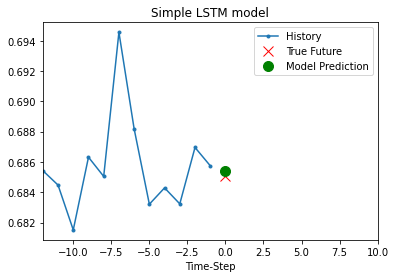

8/8 [==============================] - 0s 4ms/step


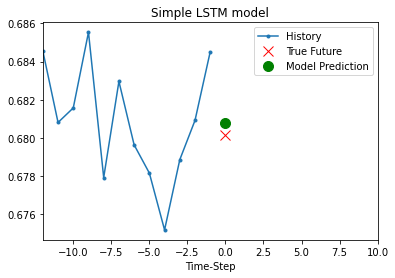

8/8 [==============================] - 0s 3ms/step


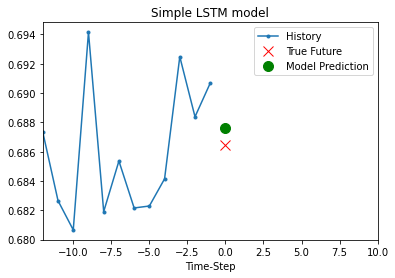

8/8 [==============================] - 0s 3ms/step


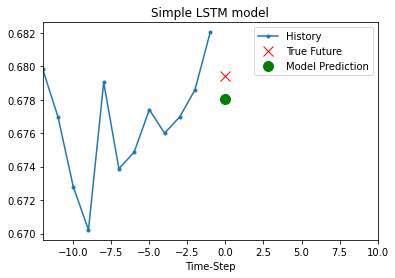

8/8 [==============================] - 0s 3ms/step


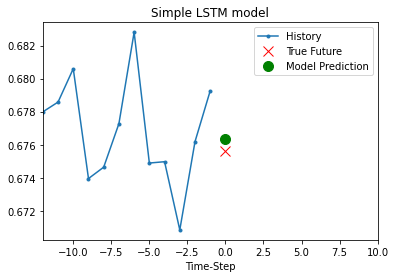

In [79]:

for x, y in val_univariate.take(5): # take 5 random inputs from validation data
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [75]:
def create_time_steps(length):
  return list(range(-length, 0))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [73]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go'] # dot-line, red-x, green-o  refer: https://matplotlib.org/3.1.1/api/markers_api.html
  time_steps = create_time_steps(plot_data[0].shape[0])
  
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


In [340]:
 plt.plot(list(simple_lstm_model.predict(x),y))

8/8 [==============================] - 0s 6ms/step


TypeError: ignored

8/8 [==============================] - 0s 8ms/step


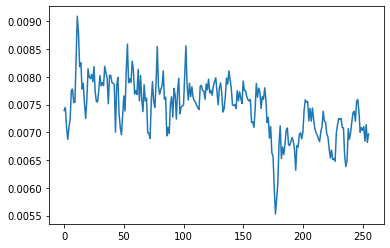

In [347]:
plt.plot(simple_lstm_model.predict(x))

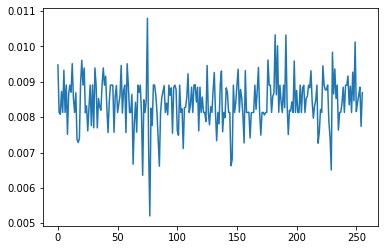

In [348]:
plt.plot(y)

In [351]:
mape(,y)

8/8 [==============================] - 0s 3ms/step


0.1271012895364485

In [350]:
def mape(x,y):
    val=np.mean(abs((simple_lstm_model.predict(x)-y)/y))
    return val

In [364]:
val_univariate

<RepeatDataset element_spec=(TensorSpec(shape=(None, 12, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

8/8 [==============================] - 0s 4ms/step


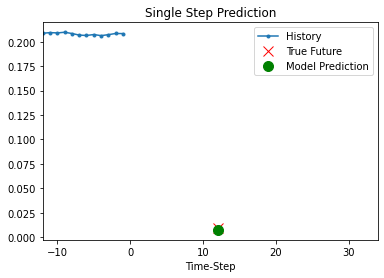

8/8 [==============================] - 0s 5ms/step


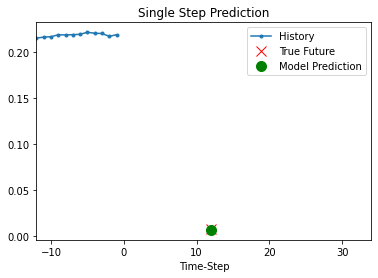

8/8 [==============================] - 0s 5ms/step


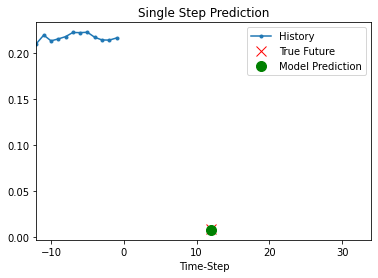

8/8 [==============================] - 0s 6ms/step


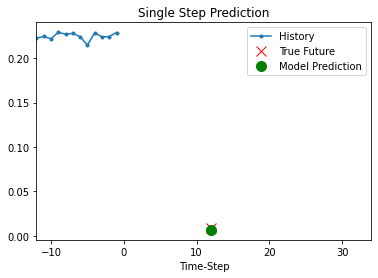

8/8 [==============================] - 0s 9ms/step


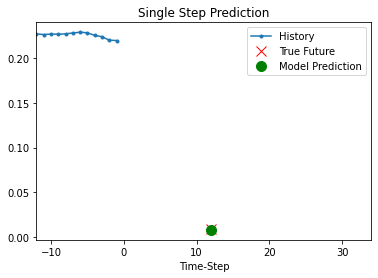

In [366]:
for x, y in val_univariate.take(5):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [361]:
np.mean(p)

0.754718969199068